In [38]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded =  files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [4]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X=df.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y=df.iloc[:,13]

In [7]:
dummies=pd.get_dummies(X['Geography'],drop_first=True)
X=pd.concat([X,dummies],axis=1)
X.drop('Geography',axis=1,inplace=True)

In [8]:
dummies=pd.get_dummies(X['Gender'],drop_first=True)
X=pd.concat([X,dummies],axis=1)
X.drop('Gender',axis=1,inplace=True)

In [9]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [14]:
X.shape

(10000, 11)

In [15]:
classifier=Sequential()

In [16]:
classifier.add(Dense(units=11,activation='relu'))

In [17]:
classifier.add(Dense(units=7,activation='relu'))

In [18]:
classifier.add(Dense(units=6,activation='relu'))

In [19]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [20]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=.01)

In [21]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
import tensorflow
early_stopping=tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False

)

In [23]:
model_history=classifier.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.4158 - accuracy: 0.8283 - val_loss: 0.3647 - val_accuracy: 0.8565
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3600 - accuracy: 0.8556 - val_loss: 0.3567 - val_accuracy: 0.8588
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3488 - accuracy: 0.8578 - val_loss: 0.3540 - val_accuracy: 0.8542
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3496 - accuracy: 0.8537 - val_loss: 0.3476 - val_accuracy: 0.8603
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8589 - val_loss: 0.3412 - val_accuracy: 0.8626
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8559 - val_loss: 0.3467 - val_accuracy: 0.8546
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3416 - accuracy: 0.8600 - val_loss: 0.3558 - val_accuracy:

In [24]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

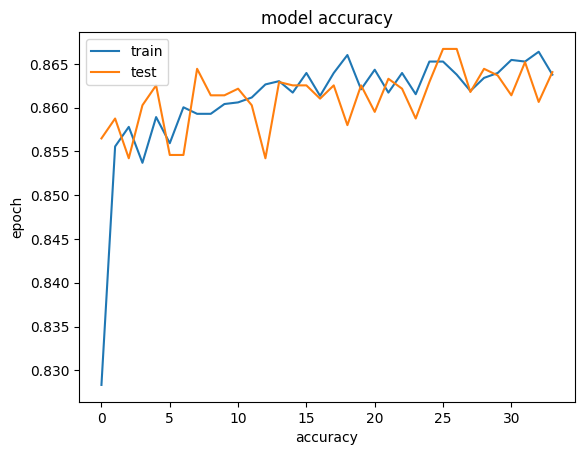

In [25]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'])
plt.show()

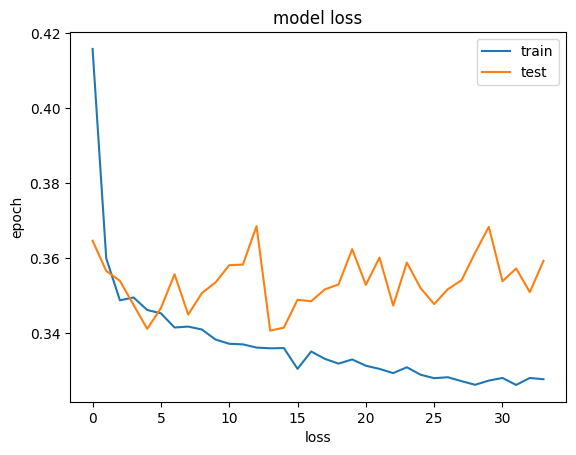

In [26]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("model loss")
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'])
plt.show()

In [27]:
y_pred=classifier.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [28]:
len(y_pred)

2000

In [29]:
y_pred=(y_pred>=.5)

In [30]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm=confusion_matrix(y_test,y_pred)

In [34]:
import seaborn as sns

<Axes: >

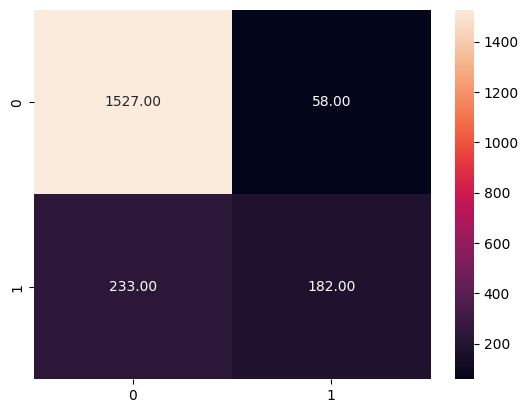

In [35]:
sns.heatmap(cm,fmt='.2f',annot=True)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8545

In [37]:
classifier.get_weights()

[array([[ 0.29709467, -0.6253795 , -0.20978533, -0.6192254 ,  1.0827124 ,
         -0.10031622, -0.02217947, -0.22789298, -0.6945698 , -0.06879626,
          0.75520116],
        [-1.7237831 , -2.4076023 ,  0.10860381, -1.5525106 , -0.76145595,
         -0.46749794,  4.3544226 ,  0.68332267, -1.9039369 ,  1.6630491 ,
         -1.7562728 ],
        [ 0.6572434 ,  0.91048396,  0.33928645, -0.3654718 ,  0.9382582 ,
          1.1963538 , -0.48113215,  0.37964302,  1.0553324 ,  1.024206  ,
         -0.16604857],
        [-2.1735327 , -1.3635979 , -2.0464427 , -0.7220082 ,  0.26767603,
         -1.3798676 ,  0.727956  ,  1.2602601 ,  1.3802007 , -0.62903005,
          1.8872845 ],
        [ 0.10237746, -0.75487685, -3.9703443 , -0.22105935, -0.5029841 ,
         -0.22385317, -2.0884814 ,  2.981161  , -2.3444734 ,  0.05501335,
         -1.641712  ],
        [-0.91468614, -0.5392725 , -0.18185169, -0.40047356,  1.165057  ,
         -1.6007458 , -0.15495853, -0.594904  , -1.4560778 , -0.2762945